## AR Model : 
An autoregressive (AR) model predicts future behavior based on past behavior. 
It's used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them.

In [82]:
#!pip install statsmodels --upgrade

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

## Import Data

In [60]:
df = pd.read_csv('C:\\Users\\Ajit Wagh\\Desktop\\TimeSeries\\daily-min-temperatures.csv', index_col=0,parse_dates=True)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-02-01,17.9
1981-03-01,18.8
1981-04-01,14.6
1981-05-01,15.8


In [61]:
X=df.values
print('Shape of data \t',df.shape)
print('Original Dataset:\n', df.head())
print('After extracting only temperature:\n', X)

Shape of data 	 (3650, 1)
Original Dataset:
             Temp
Date            
1981-01-01  20.7
1981-02-01  17.9
1981-03-01  18.8
1981-04-01  14.6
1981-05-01  15.8
After extracting only temperature:
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<AxesSubplot:xlabel='Date'>

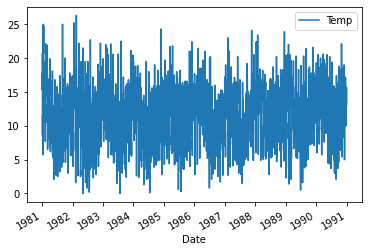

In [64]:
df.plot()

# Check for stationarity

In [65]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Temp'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ",dftest[1])
print("3. Num of Lags : ",dftest[2])
print("4. Num of observations used for ADF Regression and Critical Values Calculation : ",dftest[3])
for key, val in dftest[4].items():
    print("\t",key, ":", val)


1. ADF :  -4.444804924611681
2. P-Value :  0.00024708263003611787
3. Num of Lags :  20
4. Num of observations used for ADF Regression and Critical Values Calculation :  3629
	 1% : -3.4321532327220154
	 5% : -2.862336767636517
	 10% : -2.56719413172842


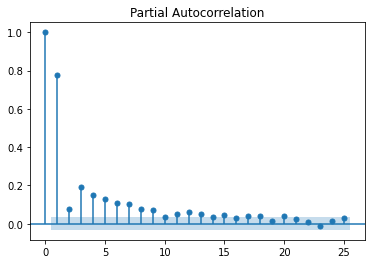

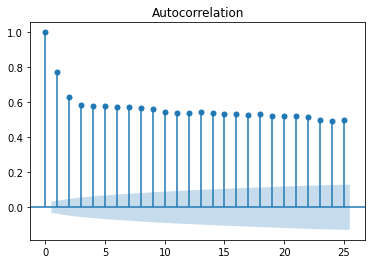

In [67]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['Temp'],lags=25)
acf = plot_acf(df['Temp'],lags=25)

# Split the data into train and test :Testing: Last 7 days

In [69]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [70]:
model=AutoReg(train,lags=10).fit()

C:\Users\Ajit Wagh\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [71]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Fri, 07 May 2021   AIC                              1.780
Time:                        15:13:00   BIC                              1.800
Sample:                            10   HQIC                             1.787
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [72]:
print(len(train))

3643


# Make Predictions on test set and Compare

In [73]:
pred=model.predict(start=len(train), end=len(X)-1, dynamic=False)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


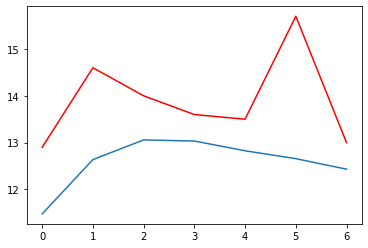

In [74]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color='red')
print(pred)

# Calculate Error

In [75]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))

In [77]:
print(rmse)

1.5638196220860605


# Making Future Predictions

In [78]:
pred_future=model.predict(start=len(X)+1, end=len(X)+7, dynamic=False)
print("The future prediction for the next week")
print(pred_future)
print('Number of predictions made: \t', len(pred_future))

The future prediction for the next week
[12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]
Number of predictions made: 	 7
